# Object Detection using YoloV5

In this Notebook, we make use of YoloV5 in order to detect fractures in the Bone. The Dataset consists of 326 Training images, 88 Validation images, and 44 Testing images along with their corresponding labels. The Dataset was obtained from RoboFlow

### Importing the Dataset from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
WD = '/content/drive/MyDrive/Datasets/ObjectDetection/bone fracture.v2-release.yolov5pytorch'
%cd $WD

/content/drive/MyDrive/Datasets/ObjectDetection/bone fracture.v2-release.yolov5pytorch


### Installing the Required Dependencies

In [3]:
#Cloning the YoloV5 repo and installing the Dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
%pip install -qr requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Datasets/ObjectDetection/bone fracture.v2-release.yolov5pytorch/yolov5


In [4]:
%cd ../

/content/drive/MyDrive/Datasets/ObjectDetection/bone fracture.v2-release.yolov5pytorch


In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

### Understanding the Data

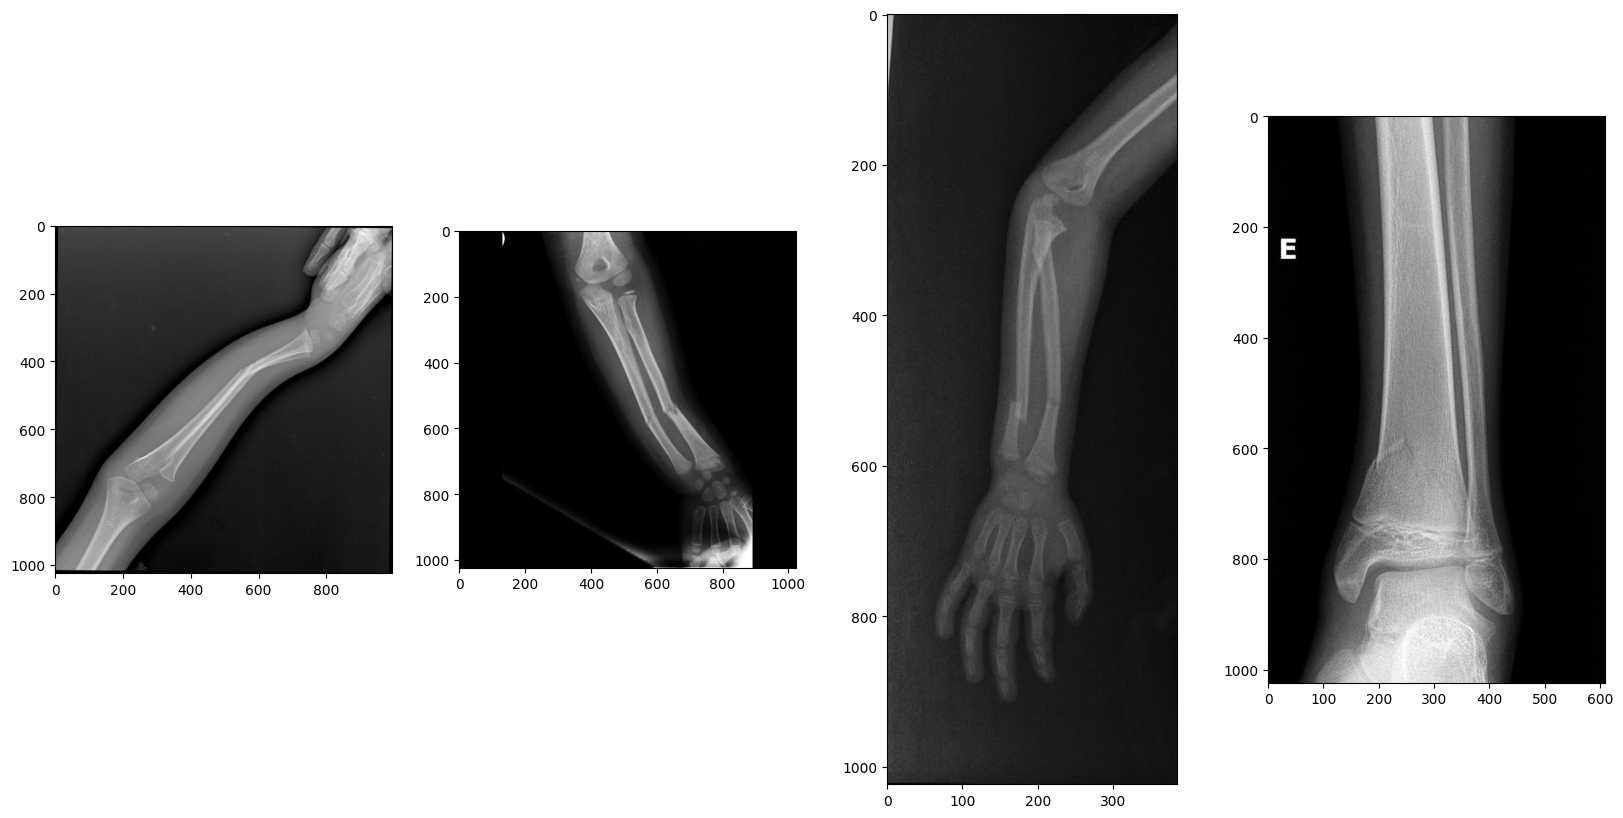

In [6]:
#Visualizing the Images we will be working with
fig, ax = plt.subplots(1,4, figsize=(20,10))
image = cv2.imread(WD+'/train/images/101_jpg.rf.01df1023e27cc86113edc3d17e5d9849.jpg')
ax[0].imshow(image)

image = cv2.imread(WD+'/train/images/10_jpg.rf.108e4ee854653611ee979134f5971e30.jpg')
ax[1].imshow(image)

image = cv2.imread(WD+'/train/images/120_jpg.rf.8cbaff1cd4e6881deb2af1de123964ad.jpg')
ax[2].imshow(image)

image = cv2.imread(WD+'/train/images/126_jpg.rf.724729c5c480e822f03f59d0226a8311.jpg')
ax[3].imshow(image)
fig.show()

In [7]:
#Confirming the Number of Images that we are working with
print(f"The Total Number of Training Images are: {len(os.listdir(WD+'/train/images'))}")
print(f"The Total Number of Validation Images are: {len(os.listdir(WD+'/valid/images'))}")
print(f"The Total Number of Test Images are: {len(os.listdir(WD+'/test/images'))}")

The Total Number of Training Images are: 326
The Total Number of Validation Images are: 88
The Total Number of Test Images are: 54


### Training the YoloV5 Model

Since the yaml file is already present, we can make use of it in order to train the YoloV5 Model

In [8]:
!python yolov5/train.py --img 326 --batch 16 --epochs 50 --data data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=326, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to '/content/drive/MyDrive/Datasets/ObjectDetection/bone': No such file or directory
YOLOv5 🚀 2023-6-26 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3

### Visualizing the Training

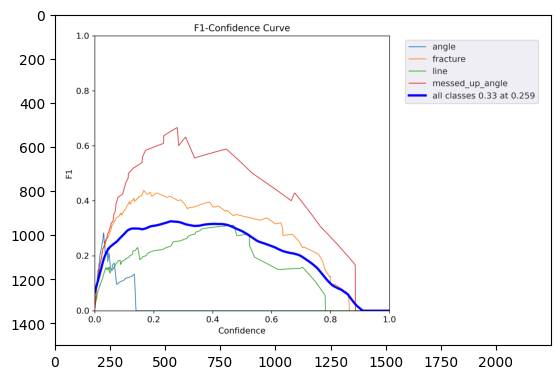

In [12]:
#Having a look at the Precision and Recall Curve
img = Image.open('./yolov5/runs/train/exp5/F1_curve.png')
plt.imshow(img)

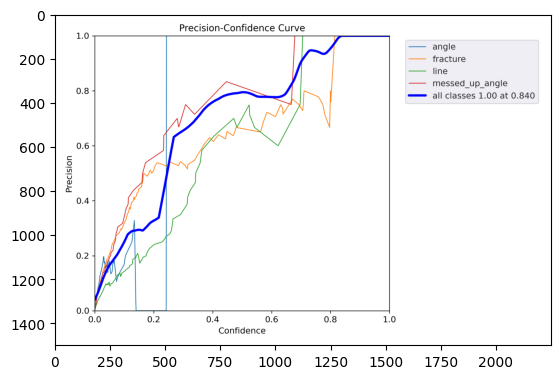

In [13]:
#Having a look at the Precision Curve
img = Image.open('./yolov5/runs/train/exp5/P_curve.png')
plt.imshow(img)

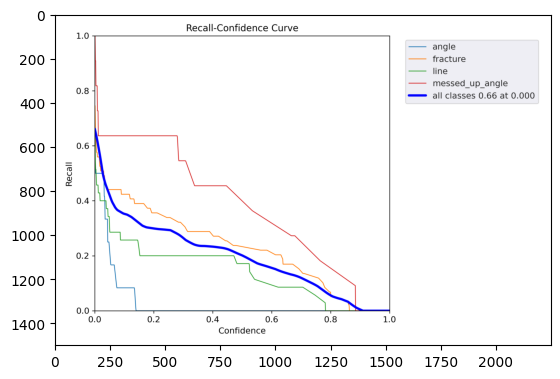

In [14]:
#Having a look at the Recall Curve
img = Image.open('./yolov5/runs/train/exp5/R_curve.png')
plt.imshow(img)

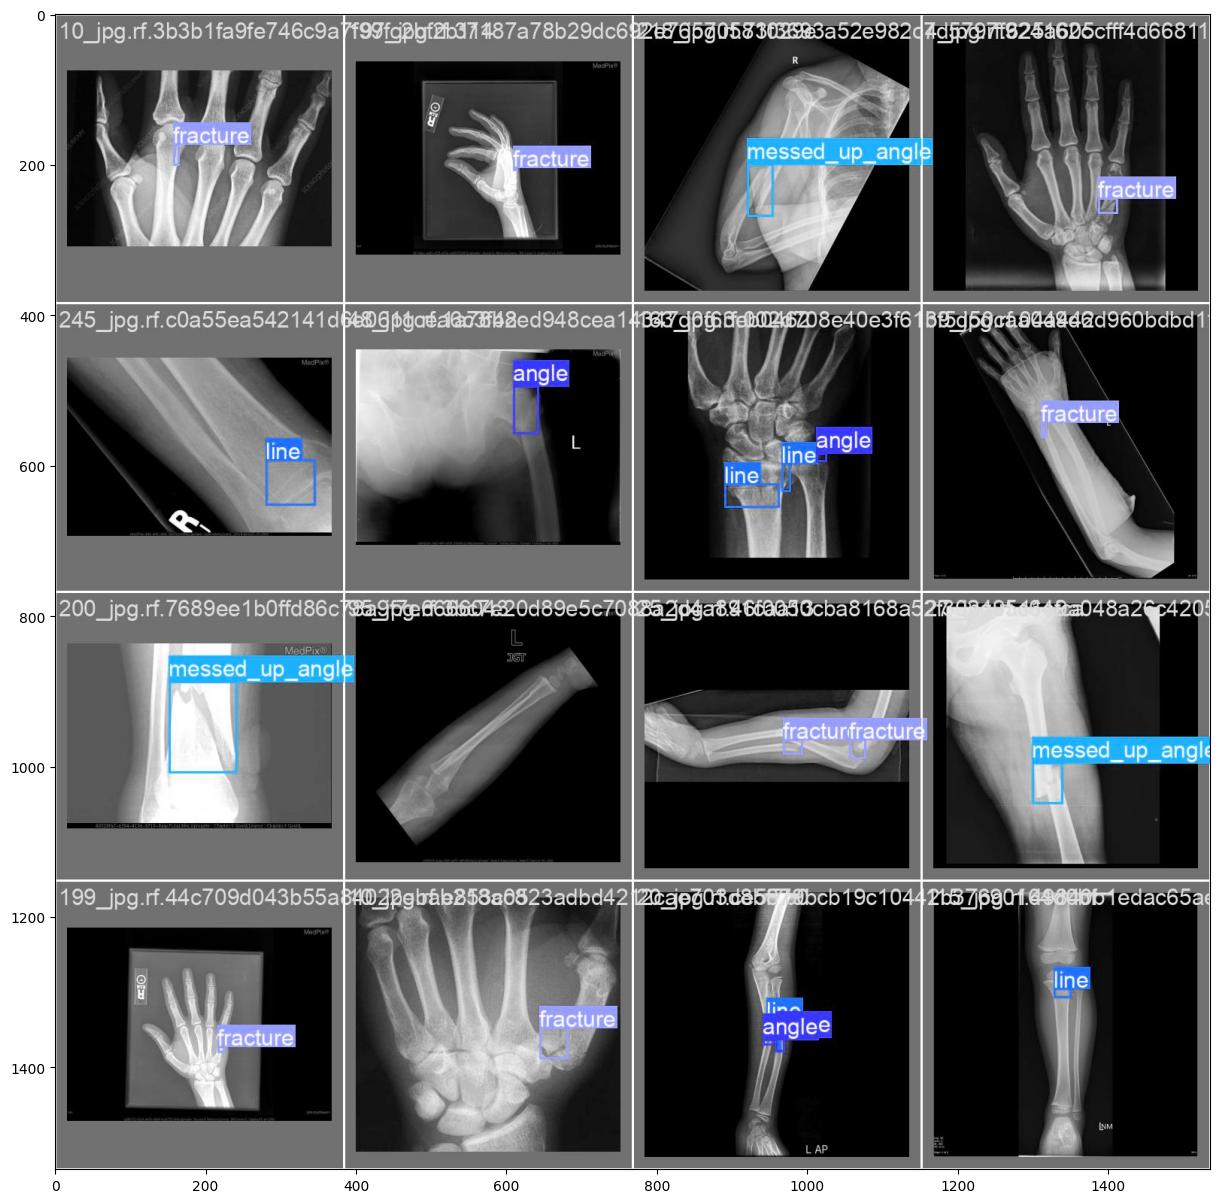

In [15]:
img = cv2.imread('./yolov5/runs/train/exp5/val_batch0_labels.jpg')
plt.figure(figsize=(15,15))
plt.imshow(img)

### Testing the Model

In [16]:
#Testing the Model on the Test directory
!python yolov5/detect.py --source './test/images' --weights './yolov5/runs/train/exp5/weights/best.pt'

detect: weights=['./yolov5/runs/train/exp5/weights/best.pt'], source=./test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/Datasets/ObjectDetection/bone': No such file or directory
YOLOv5 🚀 2023-6-26 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
image 1/54 /content/drive/MyDrive/Datasets/ObjectDetection/bone fracture.v2-release.yolov5pytorch/test/images/105_jpg.rf.3cde2fcd15a9bdf6a2d2d32aff48f33d.jpg: 640x384 2 fractures, 1 line, 55.3ms
image 2/54 /content/drive/MyDrive

In [17]:
image_dir = './yolov5/runs/detect/exp3'
image_files = []
for image in os.listdir(image_dir):
  if image.endswith('.jpg') or image.endswith('.png'):
    path = os.path.join(image_dir, image)
    image_files.append(path)

In [18]:
num_rows = 4
num_cols = 13

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50,25))

for i, ax in enumerate(axes.flatten()):
    if i < len(image_files):
        image_path = image_files[i]
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Therefore, we can see that the YoloV5 has been able to predict the existence of a Fracture of line but has some difficulty in the prediction of an angle or a messed-up angle.